In [208]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [209]:
df = pd.read_csv('combined_rattus.csv')
df

,canonical_smiles,standard_value,pIC50
0,CC(C)C(\C=C\[C@@H](O)C[C@@H](O)CC([O-])=O)=C(c...,230.0,6.64
1,Cc1cc(C)c(OCC2C[C@@H](O)CC(=O)O2)c(c1)C(Cl)C1C...,1000.0,6.00
2,Cc1cc(-c2ccc(F)cc2)c(/C=C\[C@@H]2C[C@@H](O)CC(...,1000.0,6.00
3,Cc1cc(-c2ccc(F)cc2)c(\C=C\[C@@H]2C[C@@H](O)CC(...,260.0,6.59
4,CC(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@H](CC...,269.0,6.57
...,...,...,...
1345,O[C@@H]1C[C@H](OC(=O)C1)\C=C\c1cnc2c(F)c(F)c(F...,7930.0,5.10
1346,O=C1C[C@H](O)CC(CCc2ccccc2-c2ccccc2)O1,44000.0,4.36
1347,CC(C)c1c(nn(c1OC[C@@H](O)C[C@@H](O)CC(O)=O)-c1...,14.0,7.85
1348,CC(C)c1ccc(Sc2cc3ncc(/C=C/[C@@H]4C[C@@H](O)CC(...,10600.0,4.97


In [210]:
df.dropna(inplace=True)
df

,canonical_smiles,standard_value,pIC50
0,CC(C)C(\C=C\[C@@H](O)C[C@@H](O)CC([O-])=O)=C(c...,230.0,6.64
1,Cc1cc(C)c(OCC2C[C@@H](O)CC(=O)O2)c(c1)C(Cl)C1C...,1000.0,6.00
2,Cc1cc(-c2ccc(F)cc2)c(/C=C\[C@@H]2C[C@@H](O)CC(...,1000.0,6.00
3,Cc1cc(-c2ccc(F)cc2)c(\C=C\[C@@H]2C[C@@H](O)CC(...,260.0,6.59
4,CC(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@H](CC...,269.0,6.57
...,...,...,...
1345,O[C@@H]1C[C@H](OC(=O)C1)\C=C\c1cnc2c(F)c(F)c(F...,7930.0,5.10
1346,O=C1C[C@H](O)CC(CCc2ccccc2-c2ccccc2)O1,44000.0,4.36
1347,CC(C)c1c(nn(c1OC[C@@H](O)C[C@@H](O)CC(O)=O)-c1...,14.0,7.85
1348,CC(C)c1ccc(Sc2cc3ncc(/C=C/[C@@H]4C[C@@H](O)CC(...,10600.0,4.97


In [211]:
df.canonical_smiles.duplicated().sum()

0

In [212]:
df = df[2:]
df.reset_index(drop=True, inplace=True)
df

,canonical_smiles,standard_value,pIC50
0,Cc1cc(-c2ccc(F)cc2)c(/C=C\[C@@H]2C[C@@H](O)CC(...,1000.0,6.00
1,Cc1cc(-c2ccc(F)cc2)c(\C=C\[C@@H]2C[C@@H](O)CC(...,260.0,6.59
2,CC(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@H](CC...,269.0,6.57
3,CC(C)c1c(C(=O)NCc2ccccc2)nn(-c2ccc(F)cc2)c1OC[...,3.8,8.42
4,CC(C)c1nc(-c2ccccc2)n(c1\C=C\[C@@H](O)C[C@@H](...,2.6,8.59
...,...,...,...
1343,O[C@@H]1C[C@H](OC(=O)C1)\C=C\c1cnc2c(F)c(F)c(F...,7930.0,5.10
1344,O=C1C[C@H](O)CC(CCc2ccccc2-c2ccccc2)O1,44000.0,4.36
1345,CC(C)c1c(nn(c1OC[C@@H](O)C[C@@H](O)CC(O)=O)-c1...,14.0,7.85
1346,CC(C)c1ccc(Sc2cc3ncc(/C=C/[C@@H]4C[C@@H](O)CC(...,10600.0,4.97


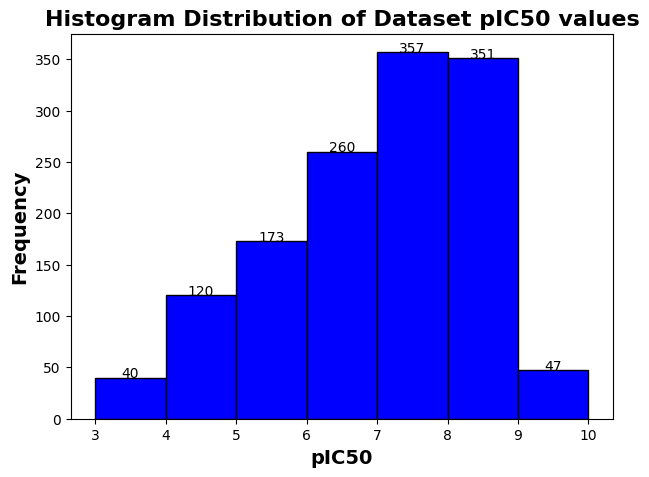

In [213]:
plt.figure(figsize=(7, 5))
bin = [3, 4, 5, 6, 7, 8, 9, 10]
n, bins, _  = plt.hist(df['pIC50'], bins=bin, color='blue',edgecolor='black')
plt.xlabel('pIC50', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Histogram Distribution of Dataset pIC50 values', fontsize=16, fontweight='bold')

for i in range(len(bins) - 1):
    plt.text((bins[i] + bins[i + 1]) / 2, n[i], 
             str(int(n[i])), ha='center')


In [214]:
df.to_csv('real_df_rattus.csv', index=False)

In [215]:
df = pd.read_csv('real_df_rattus.csv')
df

,canonical_smiles,standard_value,pIC50
0,Cc1cc(-c2ccc(F)cc2)c(/C=C\[C@@H]2C[C@@H](O)CC(...,1000.0,6.00
1,Cc1cc(-c2ccc(F)cc2)c(\C=C\[C@@H]2C[C@@H](O)CC(...,260.0,6.59
2,CC(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@H](CC...,269.0,6.57
3,CC(C)c1c(C(=O)NCc2ccccc2)nn(-c2ccc(F)cc2)c1OC[...,3.8,8.42
4,CC(C)c1nc(-c2ccccc2)n(c1\C=C\[C@@H](O)C[C@@H](...,2.6,8.59
...,...,...,...
1343,O[C@@H]1C[C@H](OC(=O)C1)\C=C\c1cnc2c(F)c(F)c(F...,7930.0,5.10
1344,O=C1C[C@H](O)CC(CCc2ccccc2-c2ccccc2)O1,44000.0,4.36
1345,CC(C)c1c(nn(c1OC[C@@H](O)C[C@@H](O)CC(O)=O)-c1...,14.0,7.85
1346,CC(C)c1ccc(Sc2cc3ncc(/C=C/[C@@H]4C[C@@H](O)CC(...,10600.0,4.97


In [216]:
df.drop(columns='standard_value', inplace=True)
df

,canonical_smiles,pIC50
0,Cc1cc(-c2ccc(F)cc2)c(/C=C\[C@@H]2C[C@@H](O)CC(...,6.00
1,Cc1cc(-c2ccc(F)cc2)c(\C=C\[C@@H]2C[C@@H](O)CC(...,6.59
2,CC(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@H](CC...,6.57
3,CC(C)c1c(C(=O)NCc2ccccc2)nn(-c2ccc(F)cc2)c1OC[...,8.42
4,CC(C)c1nc(-c2ccccc2)n(c1\C=C\[C@@H](O)C[C@@H](...,8.59
...,...,...
1343,O[C@@H]1C[C@H](OC(=O)C1)\C=C\c1cnc2c(F)c(F)c(F...,5.10
1344,O=C1C[C@H](O)CC(CCc2ccccc2-c2ccccc2)O1,4.36
1345,CC(C)c1c(nn(c1OC[C@@H](O)C[C@@H](O)CC(O)=O)-c1...,7.85
1346,CC(C)c1ccc(Sc2cc3ncc(/C=C/[C@@H]4C[C@@H](O)CC(...,4.97


In [217]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split    

In [218]:
smiles = df['canonical_smiles'].to_list()
embedding = []
for smile in smiles:    
    molecule = Chem.MolFromSmiles(smile)
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecule, radius=2, nBits=2048)
    fingerprint_array = np.array(fingerprint)    
    embedding.append(fingerprint_array)
df1 = pd.DataFrame(embedding)
df2 = df.pIC50
df = pd.concat([df2, df1], axis=1)
df

,pIC50,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,6.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.57,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,8.42,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.59,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,5.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1344,4.36,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1345,7.85,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1346,4.97,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
class Regression(nn.Module):
    def __init__(self, input_size = 2048, h1 = 50, h2 = 45, h3 = 30, output_size = 1):
        super(Regression, self).__init__()
        self.fc1 = nn.Linear(input_size, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.fc4 = nn.Linear(h3, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
        

In [220]:
torch.manual_seed(42)
model = Regression()

In [221]:
X = df.drop(columns='pIC50').values
y = df.pIC50.values


In [222]:
display(X,y)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

array([6.  , 6.59, 6.57, ..., 7.85, 4.97, 6.4 ])

In [223]:
X.dtype, y.dtype

(dtype('int64'), dtype('float64'))

In [224]:
X.shape

(1348, 2048)

In [225]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

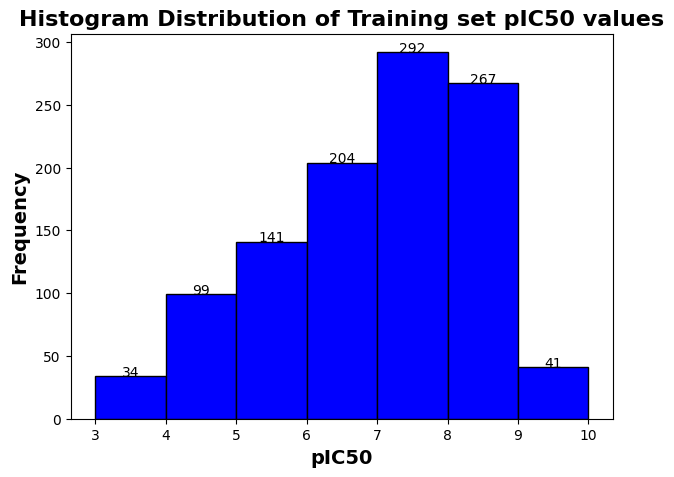

In [226]:
plt.figure(figsize=(7, 5))
n, bins, _  = plt.hist(y_train, bins=bin, color='blue',edgecolor='black')
plt.xlabel('pIC50', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Histogram Distribution of Training set pIC50 values', fontsize=16, fontweight='bold')
for i in range(len(bins) - 1):
    plt.text((bins[i] + bins[i + 1]) / 2, n[i], 
             str(int(n[i])), ha='center')
plt.show()

In [227]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)


In [228]:
x_test.dtype, y_test.dtype, x_train.dtype, y_train.dtype

(torch.float32, torch.float32, torch.float32, torch.float32)

In [229]:
display(x_test.shape, y_test.shape, x_train.shape, y_train.shape)

torch.Size([270, 2048])

torch.Size([270])

torch.Size([1078, 2048])

torch.Size([1078])

In [230]:
display(x_train, y_train,x_test, y_test)

tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [1., 1., 0.,  ..., 0., 0., 0.]])

tensor([7.5400, 9.0000, 5.8200,  ..., 9.3000, 8.1500, 8.2700])

tensor([[1., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]])

tensor([6.8500, 4.7000, 7.6800, 8.1500, 8.4300, 7.7700, 8.5200, 8.6000, 4.3000,
        7.8900, 4.0000, 8.3300, 9.0500, 6.1500, 8.5400, 4.8900, 7.4900, 6.4300,
        7.6600, 8.7000, 8.6200, 6.3800, 7.2800, 5.8500, 9.5200, 7.5200, 8.0800,
        7.4100, 6.7200, 8.3900, 8.6200, 8.1500, 5.4700, 5.7200, 7.5100, 5.8500,
        6.1000, 8.1500, 3.8000, 6.3200, 8.7000, 6.0000, 7.0200, 7.5700, 8.1500,
        7.5700, 8.7000, 5.5900, 8.3000, 5.9200, 5.4300, 4.7000, 8.5200, 7.4900,
        6.4600, 8.1000, 7.8000, 5.4300, 4.8100, 8.3000, 5.2000, 8.5200, 6.2200,
        8.3300, 8.0000, 8.4000, 4.4200, 7.7700, 6.3000, 6.4400, 5.0000, 8.5400,
        7.0000, 7.8000, 7.3000, 8.1500, 6.7200, 5.0300, 8.4200, 6.7000, 6.6800,
        6.4900, 6.6300, 8.5200, 6.1800, 6.0500, 5.5200, 7.5900, 8.0400, 7.0000,
        5.8000, 5.4900, 7.6200, 7.3700, 8.2200, 6.1200, 6.7000, 7.0300, 5.5300,
        8.3800, 7.8900, 5.8500, 8.2100, 7.3400, 8.9200, 8.6000, 7.8200, 6.1600,
        5.0000, 8.0500, 3.9100, 8.3200, 

In [231]:
criteria = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [232]:
import torch
from sklearn.metrics import r2_score, mean_squared_error

epochs = 1000
losses = []
var_losses = []
val_r2_scores = []
   


patience = 10 
best_r2_val = float('-inf')
patience_counter = 0

for i in range(epochs):
    # Training step
    model.train()  # Set model to training mode
    y_pred = model.forward(x_train)
    y_pred = y_pred.squeeze()
    loss = criteria(y_pred, y_train)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation step
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  
        y_val_pred = model.forward(x_test)
        y_val_pred = y_val_pred.squeeze()
        loss_val = criteria(y_val_pred, y_test)
        mse = mean_squared_error(y_test.detach().numpy(), y_val_pred.detach().numpy())
        rmse = np.sqrt(mse)
        var_losses.append(loss_val.item())
        r2_val = r2_score(y_test.detach().numpy(), y_val_pred.detach().numpy())


    if i % 10 == 0:
        print(f'epoch: {i}  loss: {loss.item()}')
        print(f'Training R2: {r2_score(y_train.detach().numpy(), y_pred.detach().numpy())}')
        print(f'Validation loss: {loss_val.item()}')
        print(f'Validation R2: {r2_val}')
        print(f'Validation rmse: {rmse}')
        print('--------------------------------------------------')

    # Early stopping logic
    if r2_val > best_r2_val:
        best_r2_val = r2_val
        patience_counter = 0  # Reset patience counter
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print('Early Stopping')
        break

    val_r2_scores.append(r2_val)


epoch: 0  loss: 49.183555603027344
Training R2: -23.56653601428128
Validation loss: 47.64571762084961
Validation R2: -24.29157134579132
Validation rmse: 6.902587890625
--------------------------------------------------
epoch: 10  loss: 2.657670021057129
Training R2: -0.32747111298604215
Validation loss: 5.379941463470459
Validation R2: -1.8558113616562784
Validation rmse: 2.319470167160034
--------------------------------------------------
epoch: 20  loss: 2.6363563537597656
Training R2: -0.31682536409382656
Validation loss: 1.0558950901031494
Validation R2: 0.4395037561142282
Validation rmse: 1.0275675058364868
--------------------------------------------------
epoch: 30  loss: 0.5487265586853027
Training R2: 0.7259183027501495
Validation loss: 0.8943636417388916
Validation R2: 0.5252487708064979
Validation rmse: 0.9457080364227295
--------------------------------------------------
epoch: 40  loss: 0.44204649329185486
Training R2: 0.7792036096128825
Validation loss: 0.3598680198192596

In [233]:
val_r2_scores

[-24.29157134579132,
 -21.252528964277882,
 -15.752329771859596,
 -7.825565742772046,
 -0.40843218118079516,
 -4.2684135877951315,
 -5.189346675329921,
 -1.0183148639825013,
 0.5389228628366058,
 -0.4599344107986918,
 -1.8558113616562784,
 -2.553773248034909,
 -2.364179007748634,
 -1.4761325831375287,
 -0.294853300098433,
 0.5892943149092023,
 0.6163679761298626,
 -0.1344843510199203,
 -0.6622641204729662,
 -0.2896249454745201,
 0.4395037561142282,
 0.7716770562579527,
 0.5892253149025426,
 0.2136122246699398,
 -0.030077393571225963,
 0.001170210682212236,
 0.2676844591149323,
 0.6011407424840469,
 0.7916463275974956,
 0.7284677422883745,
 0.5252487708064979,
 0.4345926817036715,
 0.5577725700189158,
 0.7443365589641942,
 0.812134835854935,
 0.736239547238237,
 0.6182287989783155,
 0.5653303335131441,
 0.6142250524854308,
 0.7227158602361846,
 0.8089727819091076,
 0.8166105516734313,
 0.7655326097007914,
 0.7310364458817225,
 0.7570973500681573,
 0.8099593211803082,
 0.8303217131275767

Text(0, 0.5, 'Loss')

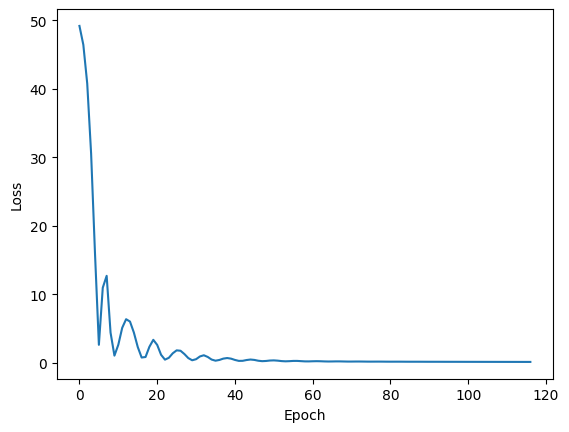

In [234]:
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

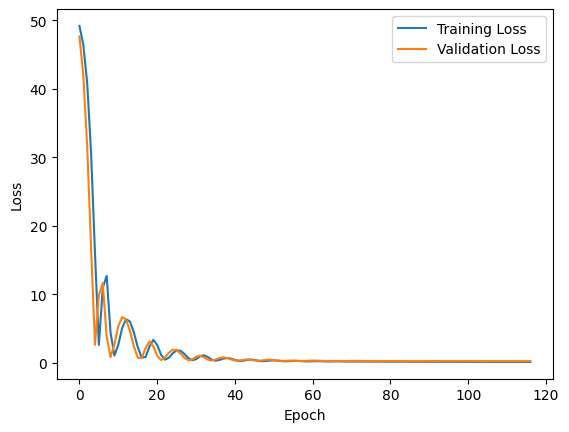

In [235]:
plt.plot(losses, label='Training Loss')
plt.plot(var_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [236]:
model.eval()
with torch.no_grad():
    y_pred = model.forward(x_test)
    y_pred = y_pred.squeeze()
    loss = criteria(y_pred, y_test)
    mse = mean_squared_error(y_test.detach().numpy(), y_pred.detach().numpy())
    rmse = np.sqrt(mse)
    print(f'RMSE on test set: {rmse}')
    print(f'Loss on test set: {loss.item()}')
    r2 = r2_score(y_test.detach().numpy(), y_pred.detach().numpy())
    print(f'R2 on test set: {r2}')

RMSE on test set: 0.5215674638748169
Loss on test set: 0.27203261852264404
R2 on test set: 0.8555980923184751


In [237]:
y_test

tensor([6.8500, 4.7000, 7.6800, 8.1500, 8.4300, 7.7700, 8.5200, 8.6000, 4.3000,
        7.8900, 4.0000, 8.3300, 9.0500, 6.1500, 8.5400, 4.8900, 7.4900, 6.4300,
        7.6600, 8.7000, 8.6200, 6.3800, 7.2800, 5.8500, 9.5200, 7.5200, 8.0800,
        7.4100, 6.7200, 8.3900, 8.6200, 8.1500, 5.4700, 5.7200, 7.5100, 5.8500,
        6.1000, 8.1500, 3.8000, 6.3200, 8.7000, 6.0000, 7.0200, 7.5700, 8.1500,
        7.5700, 8.7000, 5.5900, 8.3000, 5.9200, 5.4300, 4.7000, 8.5200, 7.4900,
        6.4600, 8.1000, 7.8000, 5.4300, 4.8100, 8.3000, 5.2000, 8.5200, 6.2200,
        8.3300, 8.0000, 8.4000, 4.4200, 7.7700, 6.3000, 6.4400, 5.0000, 8.5400,
        7.0000, 7.8000, 7.3000, 8.1500, 6.7200, 5.0300, 8.4200, 6.7000, 6.6800,
        6.4900, 6.6300, 8.5200, 6.1800, 6.0500, 5.5200, 7.5900, 8.0400, 7.0000,
        5.8000, 5.4900, 7.6200, 7.3700, 8.2200, 6.1200, 6.7000, 7.0300, 5.5300,
        8.3800, 7.8900, 5.8500, 8.2100, 7.3400, 8.9200, 8.6000, 7.8200, 6.1600,
        5.0000, 8.0500, 3.9100, 8.3200, 

In [238]:
y_pred = torch.FloatTensor(y_pred)
y_pred

tensor([6.8800, 4.7569, 7.7915, 7.4671, 8.7738, 7.5595, 8.2437, 9.3137, 4.0030,
        7.7903, 4.4584, 8.2353, 8.0743, 7.2715, 8.4248, 4.9349, 7.5109, 6.5451,
        7.6239, 8.5297, 8.6161, 6.4584, 7.8478, 7.3693, 9.5410, 7.5743, 8.3462,
        7.0691, 6.5072, 8.5635, 8.8617, 8.3099, 5.4766, 5.7274, 7.8835, 5.9270,
        6.8590, 7.7841, 3.8936, 6.4236, 8.2215, 5.9281, 6.8970, 7.1431, 7.4671,
        7.4746, 7.8213, 4.7893, 7.5465, 6.6472, 8.2594, 4.6509, 8.5179, 7.3608,
        6.9801, 7.5626, 7.8379, 4.2337, 4.7448, 8.4106, 5.2641, 8.6856, 6.2024,
        8.4868, 8.0910, 8.6682, 4.4880, 8.0175, 6.2299, 6.0472, 5.3820, 8.6410,
        7.0273, 8.3930, 7.2248, 7.7018, 6.6682, 5.1570, 8.4840, 6.0520, 6.5376,
        6.0787, 6.8679, 8.1977, 7.4764, 5.9348, 5.5834, 7.6392, 7.8622, 6.9594,
        5.8045, 5.4946, 7.7402, 7.1723, 8.2239, 6.4265, 6.6059, 7.1682, 6.5155,
        7.7168, 7.9469, 7.4517, 8.1830, 7.4668, 8.9013, 7.2197, 6.9452, 4.6365,
        5.0724, 8.1430, 3.7817, 7.3776, 

In [239]:
y_pred.shape,y_test.shape

(torch.Size([270]), torch.Size([270]))

Text(0.5, 1.0, 'True vs Predicted pIC50')

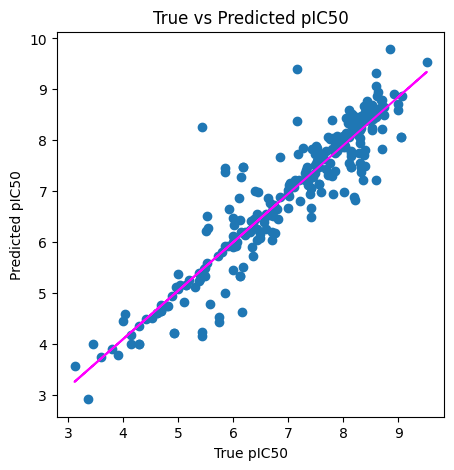

In [240]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test.detach().numpy(), y_pred.detach().numpy())
z = np.polyfit(y_test.detach().numpy(), y_pred.detach().numpy(), 1)
p = np.poly1d(z)
plt.plot(y_test.detach().numpy(),p(y_test.detach().numpy()), color='magenta')
plt.xlabel('True pIC50')
plt.ylabel('Predicted pIC50')
plt.title('True vs Predicted pIC50')




In [241]:
#saving the model
torch.save(model.state_dict(), 'Hmg-coa_model.pth')



## TRYING THE MODEL OUT


In [242]:
df_sample = pd.read_csv('combined_rattus.csv')
df_sample = df_sample[:2]
df_sample

,canonical_smiles,standard_value,pIC50
0,CC(C)C(\C=C\[C@@H](O)C[C@@H](O)CC([O-])=O)=C(c...,230.0,6.64
1,Cc1cc(C)c(OCC2C[C@@H](O)CC(=O)O2)c(c1)C(Cl)C1C...,1000.0,6.00


In [243]:
smiles = df_sample['canonical_smiles'].to_list()
embedding = []
for smile in smiles:    
    molecule = Chem.MolFromSmiles(smile)
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecule, radius=2, nBits=2048)
    fingerprint_array = np.array(fingerprint)    
    embedding.append(fingerprint_array)
df1 = pd.DataFrame(embedding)
df2 = df_sample.pIC50
df_sample = pd.concat([df2, df1], axis=1)
df_sample

,pIC50,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,6.64,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,6.00,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [244]:
df_sample.drop(columns='pIC50', inplace=True)
df_sample

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [245]:
x_sample = torch.FloatTensor(df_sample.values)

In [246]:
x_sample

tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.]])

In [247]:
model = Regression()
model.load_state_dict(torch.load('Hmg-coa_model.pth'))

<All keys matched successfully>

In [248]:
model.eval()

Regression(
  (fc1): Linear(in_features=2048, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=45, bias=True)
  (fc3): Linear(in_features=45, out_features=30, bias=True)
  (fc4): Linear(in_features=30, out_features=1, bias=True)
)

In [249]:
model.eval()
with torch.no_grad():
    y_pred = model.forward(x_sample)
    y_pred = y_pred.squeeze()
    print(y_pred)

tensor([6.5769, 6.0228])


## CROSS VALIDATION OF THE MODEL

In [250]:
import torch
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score    
from sklearn.preprocessing import StandardScaler
from torch.nn import functional as F
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score

In [251]:
k = 10
kf = KFold(n_splits=k, random_state=None, shuffle=True)

accuracy = []


for train_index, test_index in kf.split(x_train):
    x_train_k, x_test_k = x_train[train_index], x_train[test_index]
    y_train_k, y_test_k = y_train[train_index], y_train[test_index]
    
    model_cross = Regression()
    criteria = nn.MSELoss()
    optimizer = torch.optim.Adam(model_cross.parameters(), lr=0.01)
    
    epochs = 1000
    losses = []
    var_losses = []
    val_r2_scores = []
    
    patience = 10 # Number of epochs to wait for an improvement
    best_r2_val = float('-inf')
    patience_counter = 0
    
    for i in range(epochs):
        # Training step
        model_cross.train()  
        y_pred = model_cross.forward(x_train_k)
        y_pred = y_pred.squeeze()
        loss = criteria(y_pred, y_train_k)
        losses.append(loss.item())
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        # Validation step
        model_cross.eval() 
        with torch.no_grad(): 
            y_val_pred = model_cross.forward(x_test_k)
            y_val_pred = y_val_pred.squeeze()
            loss_val = criteria(y_val_pred, y_test_k)
            mse = mean_squared_error(y_test_k.detach().numpy(), y_val_pred.detach().numpy())
            rmse = np.sqrt(mse)
            var_losses.append(loss_val.item())
            r2_val = r2_score(y_test_k.detach().numpy(), y_val_pred.detach().numpy())
    
        if i % 10 == 0:
            print(f'epoch: {i}  loss: {loss.item()}')
            print(f'Training R2: {r2_score(y_train_k.detach().numpy(), y_pred.detach().numpy())}')
            print(f'Validation loss: {loss_val.item()}')
            print(f'Validation R2: {r2_val}')
            print(f'Validation rmse: {rmse}')
            print('--------------------------------------------------')
    
        # Early stopping logic
        if r2_val > best_r2_val:
            best_r2_val = r2_val
            patience_counter = 0  
        else:
            patience_counter += 1
    
        if patience_counter >= patience:
            print('Early Stopping')
            break
        val_r2_scores.append(r2_val)

    accuracy.append(r2_val)
    


epoch: 0  loss: 50.891510009765625
Training R2: -24.089146587860764
Validation loss: 45.987396240234375
Validation R2: -25.385411471532972
Validation rmse: 6.781400680541992
--------------------------------------------------
epoch: 10  loss: 1.5890846252441406
Training R2: 0.2165927551885264
Validation loss: 4.006680965423584
Validation R2: -1.2988461401682998
Validation rmse: 2.0016696453094482
--------------------------------------------------
epoch: 20  loss: 3.087979793548584
Training R2: -0.5223514524727093
Validation loss: 1.8787260055541992
Validation R2: -0.07792502716490568
Validation rmse: 1.370666265487671
--------------------------------------------------
epoch: 30  loss: 0.38017451763153076
Training R2: 0.8125767308336325
Validation loss: 0.6900858879089355
Validation R2: 0.6040610264839947
Validation rmse: 0.8307141065597534
--------------------------------------------------
epoch: 40  loss: 0.5887242555618286
Training R2: 0.7097632313041037
Validation loss: 0.64620786905

In [252]:
accuracy

[0.8116762278180256,
 0.7845161865113777,
 0.8316319626292815,
 0.8549130182516712,
 0.841217250706727,
 0.8951355722381713,
 0.9124261527982552,
 0.7065067162677616,
 0.8414252247753007,
 0.753925648741249]

In [253]:
accuracy = [round(i, 2) for i in accuracy]
accuracy

[0.81, 0.78, 0.83, 0.85, 0.84, 0.9, 0.91, 0.71, 0.84, 0.75]

In [254]:
np.mean(accuracy)

0.8220000000000001

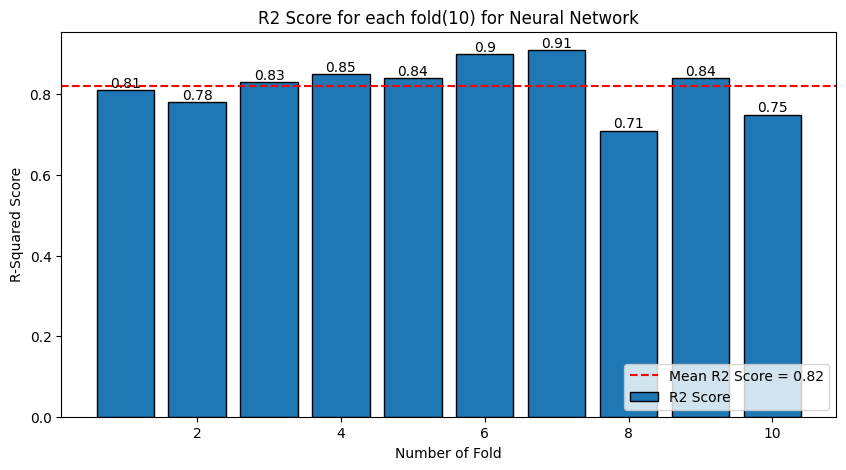

In [261]:
plt.figure(figsize=(10, 5)) 
plt.bar(range(1, k+1), accuracy,edgecolor='black')
plt.xlabel('Number of Fold')
plt.ylabel('R-Squared Score')
plt.axhline(y = 0.82,  color='r', linestyle='--')
plt.title('R2 Score for each fold(10) for Neural Network')
plt.legend(['Mean R2 Score = 0.82', 'R2 Score'],loc = 'lower right')
for i in range(k):
    plt.text(i+1, accuracy[i], accuracy[i], ha='center', va='bottom')
